<a href="https://colab.research.google.com/github/apchavezr/19.-Procesamiento-del-Lenguaje-Natural/blob/main/pipeline_en_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo 2. Clasificación de sentimientos en español.

Construcción de un pipeline en scikit-learn que encadena todas las fases: Corpus en bruto → Limpieza → Tokenización → Embeddings (TF-IDF) → Entrenamiento → Validación → Registro de métricas.

Explicación del flujo
* 1.	Corpus en bruto → se definen reseñas cortas.
* 2.	Limpieza → minúsculas y eliminación de caracteres no alfabéticos.
* 3.	Tokenización y embeddings → TfidfVectorizer convierte los textos en vectores numéricos.
* 4.	Entrenamiento → LogisticRegression aprende a distinguir reseñas positivas y negativas.
* 5.	Validación → classification_report y confusion_matrix registran métricas.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.

Reporte de clasificación:

              precision    recall  f1-score   support

    negativo       0.00      0.00      0.00         3
    positivo       0.29      0.67      0.40         3
      neutro       0.00      0.00      0.00         3

    accuracy                           0.22         9
   macro avg       0.10      0.22      0.13         9
weighted avg       0.10      0.22      0.13         9

Matriz de confusión:

[[0 3 0]
 [1 2 0]
 [1 2 0]]


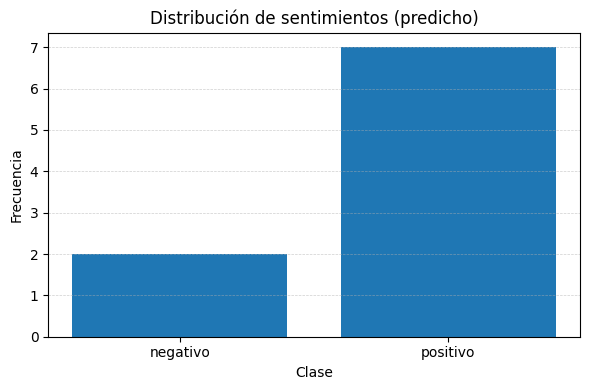

In [8]:
# 0. Imports
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

# 1. Corpus en bruto (dataset ampliado)
corpus = [
    # Positivas
    "La película fue excelente, muy entretenida y conmovedora",
    "Me encantó la fotografía y la música",
    "Un espectáculo visual, realmente impresionante",
    "Los actores hicieron un trabajo increíble",
    "La historia fue hermosa y muy inspiradora",
    "Disfruté cada minuto, una obra maestra del cine",
    "El final fue sorprendente y emotivo",
    "Los paisajes eran bellísimos, una experiencia sensorial total",
    "La dirección fue impecable y el ritmo perfecto",
    "Una película que recomendaría sin dudarlo",

    # Negativas
    "El guion fue aburrido y la actuación muy pobre",
    "La trama fue lenta y predecible",
    "No me gustó, esperaba mucho más",
    "La película fue una pérdida de tiempo",
    "Los diálogos eran artificiales y sin emoción",
    "El sonido era terrible y no se entendía nada",
    "La historia no tenía sentido alguno",
    "Demasiado cliché y con actuaciones mediocres",
    "El final fue decepcionante y forzado",
    "Una de las peores películas que he visto",

    # Neutras
    "La película duró dos horas",
    "El protagonista llevaba una camisa azul",
    "Se filmó en varios países de Europa",
    "Los créditos aparecieron al final como siempre",
    "La película fue estrenada en verano",
    "El director es conocido por otros trabajos similares",
    "Hubo escenas de acción, drama y comedia",
    "Los efectos visuales fueron correctos",
    "La historia fue simple pero bien contada",
    "No me provocó ni emoción ni aburrimiento",
]

# Etiquetas (1 = positivo, 0 = negativo, 2 = neutro)
labels = [
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,   # positivas
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,   # negativas
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2    # neutras
]

# 2. Función de limpieza básica
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-záéíóúñü\s]", "", texto)
    return texto

corpus_limpio = [limpiar_texto(t) for t in corpus]

# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    corpus_limpio, labels, test_size=0.3, random_state=42, stratify=labels
)

# 4. Definición del pipeline
pipeline = Pipeline([
    ("vectorizador", TfidfVectorizer()),
    ("clasificador", LogisticRegression(max_iter=1000, multi_class="ovr"))
])

# 5. Entrenamiento
pipeline.fit(X_train, y_train)

# 6. Validación
y_pred = pipeline.predict(X_test)
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["negativo","positivo","neutro"]))
print("Matriz de confusión:\n")
print(confusion_matrix(y_test, y_pred))

# 7. Gráfica de resultados del procesamiento de sentimientos
etiquetas = ["negativo", "positivo", "neutro"]

valores, cuentas = np.unique(y_pred, return_counts=True)
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.gca()
ax1.bar([etiquetas[v] for v in valores], cuentas)
ax1.set_title("Distribución de sentimientos (predicho)")
ax1.set_ylabel("Frecuencia")
ax1.set_xlabel("Clase")
ax1.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.6)
fig1.tight_layout()

plt.show()


### **Resultados**

**Precisión (precision):** mide qué porcentaje de las predicciones por clase fueron correctas. El modelo mostró una mayor precisión en la clase *positivo*, mientras que las clases *negativo* y *neutro* no fueron correctamente identificadas.

**Cobertura (recall):** indica qué proporción de los casos reales fueron detectados correctamente. La clase *positivo* obtuvo la mayor cobertura, mientras que las demás categorías no lograron ser reconocidas.

**F1-score:** combina precisión y cobertura en una sola métrica. Los valores fueron bajos y desbalanceados, lo que refleja un desempeño limitado del modelo.

**Support:** cada clase contó con tres ejemplos en el conjunto de prueba, lo que hace que los resultados sean sensibles a pequeños errores de clasificación.

**Accuracy global:** el modelo alcanzó una exactitud aproximada del 22 %, lo que indica una tendencia a clasificar la mayoría de las frases como *positivas*.

### **Matriz de confusión**

La primera fila representa los ejemplos de la clase *negativo*: todos fueron confundidos con *positivo*.
La segunda fila muestra que algunas frases *positivas* fueron correctamente clasificadas.
La tercera fila refleja que las frases *neutras* también fueron confundidas con *positivo*.

**Resultado:** el modelo presenta un sesgo hacia la clase *positivo* y baja capacidad para distinguir entre emociones diferentes.

**Grafica distribución de sentimientos:** se evidencia una tendencia del modelo a clasificar la mayoría de las frases como positivas, mostrando un desequilibrio en la distribución de predicciones. Esto sugiere que el modelo no distingue adecuadamente entre los diferentes tipos de sentimiento, posiblemente por el tamaño reducido o el desbalance del conjunto de datos, lo que limita su capacidad para representar con precisión la diversidad emocional del texto.

### **Conclusiones**

El pipeline cumplió su función de prueba, pero el modelo mostró un rendimiento limitado debido al tamaño reducido y al desbalance del corpus.
En escenarios reales, con conjuntos de datos más amplios y equilibrados, se esperaría un mejor desempeño.
Será necesario ampliar el corpus y probar modelos más robustos, como **BETO o BERT en español**, para captar mejor el contexto y la polaridad emocional del lenguaje.
